<a href="https://colab.research.google.com/github/Asalbek/ML-projects/blob/main/PredictingPriceofTicket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from zipfile import ZipFile

with ZipFile('/content/aviachipta-narxini-bashorat-qilish.zip') as myzip:
    with myzip.open('train_data.csv') as myfile:
     train_df = pd.read_csv(myfile)

    with myzip.open('test_data.csv') as myfile:
        test_df = pd.read_csv(myfile)
train_df.head()

,id,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,1,Vistara,UK-810,Bangalore,Early_Morning,one,Night,Mumbai,Economy,14.25,21,7212
1,2,SpiceJet,SG-5094,Hyderabad,Evening,zero,Night,Kolkata,Economy,1.75,7,5292
2,3,Vistara,UK-846,Bangalore,Morning,one,Evening,Delhi,Business,9.58,5,60553
3,4,Vistara,UK-706,Kolkata,Morning,one,Evening,Hyderabad,Economy,6.75,28,5760
4,5,Indigo,6E-5394,Chennai,Early_Morning,zero,Morning,Mumbai,Economy,2.00,4,10712


In [ ]:
#i have checked the missing values

train_df.isnull().sum()

20960.2817

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                20000 non-null  int64  
 1   airline           20000 non-null  object 
 2   flight            20000 non-null  object 
 3   source_city       20000 non-null  object 
 4   departure_time    20000 non-null  object 
 5   stops             20000 non-null  object 
 6   arrival_time      20000 non-null  object 
 7   destination_city  20000 non-null  object 
 8   class             20000 non-null  object 
 9   duration          20000 non-null  float64
 10  days_left         20000 non-null  int64  
 11  price             20000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1.8+ MB


In [ ]:
train_df.describe()

,id,duration,days_left,price
count,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,12.177627,25.924150,20960.281700
std,5773.647028,7.157944,13.624874,22775.459535
min,1.000000,0.830000,1.000000,1105.000000
25%,5000.750000,6.830000,14.000000,4783.000000
50%,10000.500000,11.250000,26.000000,7425.000000
75%,15000.250000,16.080000,38.000000,42521.000000
max,20000.000000,38.580000,49.000000,114523.000000


In [ ]:
train_df.isnull().sum()

,0
id,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


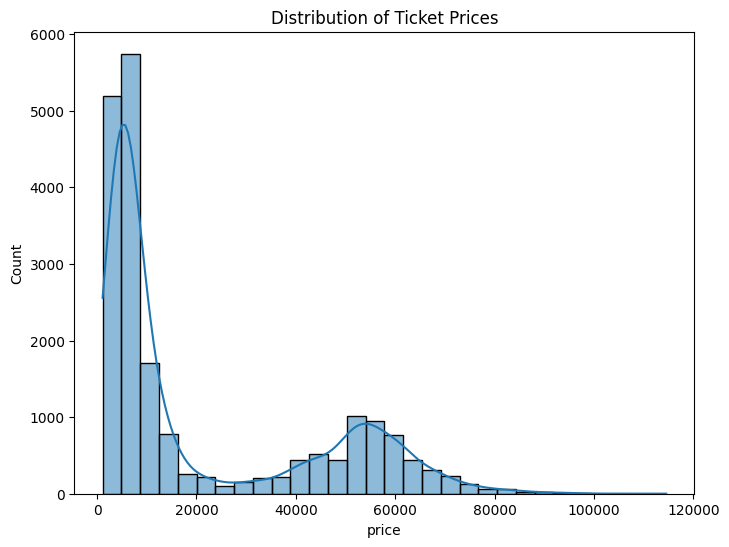

In [ ]:
# Visualize the distribution of prices
plt.figure(figsize=(8, 6))
sns.histplot(train_df['price'], bins=30, kde=True)
plt.title('Distribution of Ticket Prices')
plt.show()


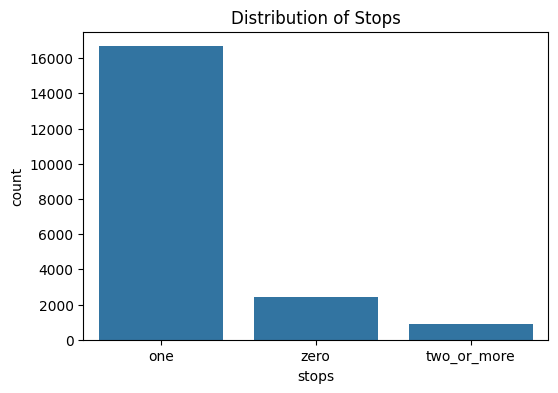

In [ ]:
# Count plot of the number of stops
plt.figure(figsize=(6, 4))
sns.countplot(x='stops', data=train_df)
plt.title('Distribution of Stops')
plt.show()

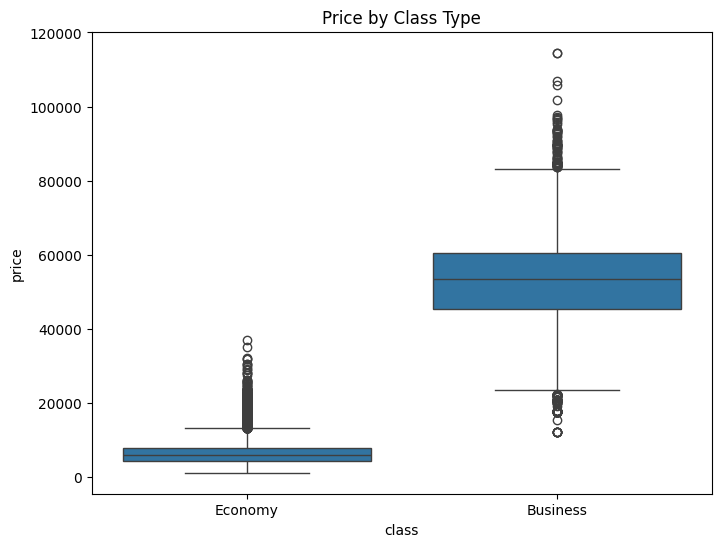

In [ ]:
# Boxplot to show the relation between 'class' and 'price'
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='price', data=train_df)
plt.title('Price by Class Type')
plt.show()

In [ ]:
#one hot encoding
train_df_encoded = pd.get_dummies(train_df, columns=[
    'airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time', 'class', 'stops'
])

In [ ]:
#unnecessary values
train_df_encoded=train_df_encoded.drop(columns=['id', 'flight'])

In [ ]:
#I encoded here

X=train_df_encoded.drop(columns=['price'])
y=train_df_encoded['price']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
#Building a model

model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_val_scaled)
y_pred

array([ 2321.9764387, 56065.6639387, 55652.5389387, ...,  7872.3983137,
       59780.9451887, -2993.5079363])

In [ ]:
#comparison with actual value

comparison_df = pd.DataFrame({'Actual Price': y_val, 'Predicted Price': y_pred})
comparison_df.head()

,Actual Price,Predicted Price
10650,5361,2321.976439
2041,50297,56065.663939
8668,60232,55652.538939
1114,74365,55548.632689
13902,4417,5870.492064


In [ ]:
#Evaluating my model's performance

mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 45165121.42375349
R-squared: 0.9139901885454329


In [ ]:
#accuracy score

accuracy_score=model.score(X_val_scaled,y_val)
accuracy_score

0.9139901885454329